#Salary_Data - Simple linear regression
>SLR works: A straight line $y=mx+b$ represents the linear relationship between the independent variable $x$ and the dependent variable $y$.

**Steps**
- Understand the data
- Checking Outliers
- Skewness
- Correlation Analysis
- Split the data
- Train the model
- Predicting the test set results
- visualization techniques
- Calculate Error
- Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Models/Simple_linear_regression/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


###**Understanding the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.duplicated().sum()

0

This data is clean

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


####**Statistical Insights:**

 **Years of Experience**
1. **Mean**: The average number of years of experience is 5.31 years.
2. **Standard Deviation (std)**: The variability in years of experience is about 2.84 years, showing a moderate spread.
3. **Min and Max**: The minimum years of experience is 1.1 years, and the maximum is 10.5 years.
4. **Quartiles**:
   - **25th Percentile (Q1)**: 25% of the data points have less than 3.2 years of experience.
   - **50th Percentile (Median)**: Half of the individuals have less than or equal to 4.7 years of experience.
   - **75th Percentile (Q3)**: 25% have more than 7.7 years of experience.

**Salary**
1. **Mean**: The average salary is \$76,003.
2. **Standard Deviation**: Salaries vary widely, with a standard deviation of \$27,414.
3. **Min and Max**: The lowest salary is \$37,731, and the highest is \$122,391.
4. **Quartiles**:
   - **25th Percentile (Q1)**: 25% of individuals earn less than \$56,720.75.
   - **50th Percentile (Median)**: Half of the individuals earn less than or equal to \$65,237.
   - **75th Percentile (Q3)**: 25% earn more than \$100,544.75.

**General Insights**
- Salary increases with experience
- Wide Salary Range
- Both salary and experience data are fairly symmetric, as the mean and median values are relatively close.


- YearsExperience and Salary are approximately symmetric

###**Checking Outliers**


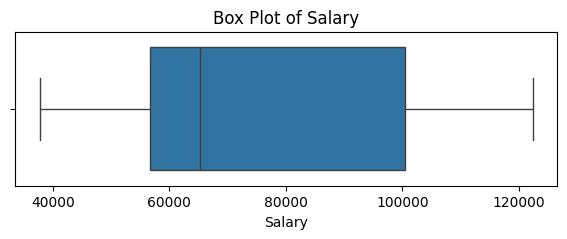

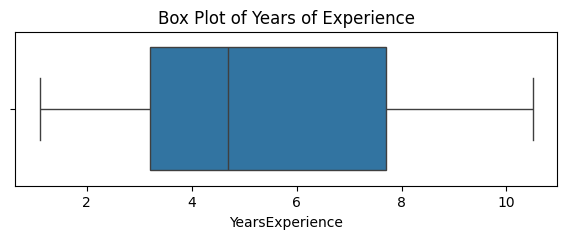

In [8]:
plt.figure(figsize=(7, 2))
sns.boxplot(x=df['Salary'])
plt.title('Box Plot of Salary')
plt.show()

plt.figure(figsize=(7, 2))
sns.boxplot(x=df['YearsExperience'])
plt.title('Box Plot of Years of Experience')
plt.show()

- No outliers

###**Skewness**

In [10]:
df.skew()

,0
YearsExperience,0.37956
Salary,0.35412


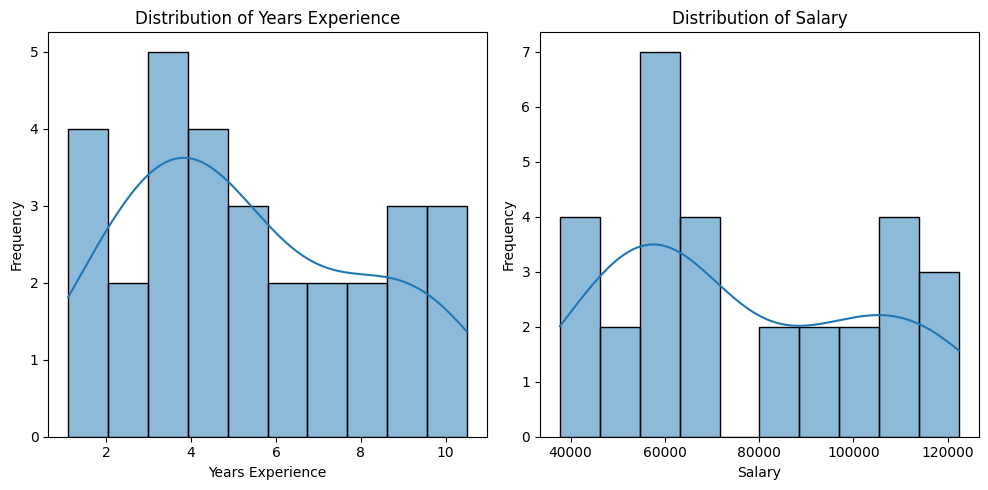

In [39]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.histplot(df['YearsExperience'], bins=10, kde=True)
plt.title('Distribution of Years Experience')
plt.xlabel('Years Experience')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.histplot(df['Salary'], bins=10, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###**Correlation Analysis**
- Identifying independent and dependent variable

In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


- Here YearsExperience$(X)$ is independent variable and Salary $(Y)$ is dependent variable.
- From this correlation matrix, the correlation coeffecient between these two variables is $0.978$, which indicates strong positive linear relationship.



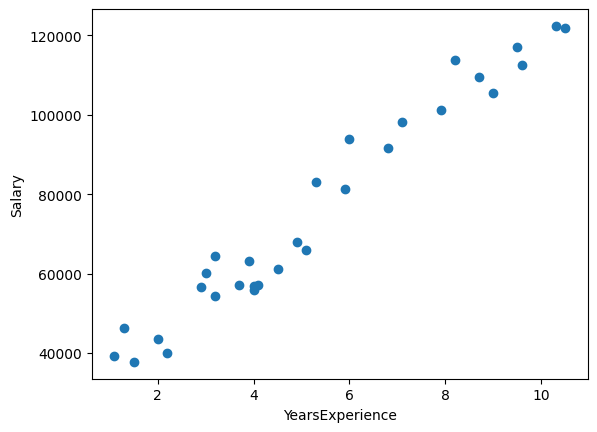

In [11]:
plt.scatter(x = df['YearsExperience'], y = df['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

###**Split the data**

In [12]:
#spliting the data into the training and testing set

X=df.iloc[:,:-1].values # select all rows except last column
y=df.iloc[:,-1].values #select all rows in last column

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


In [13]:
print('shape of X_train',X_train.shape)
print('shape of y_train',y_train.shape)
print('shape of X_test',X_test.shape)
print('shape of y_test',y_test.shape)

shape of X_train (21, 1)
shape of y_train (21,)
shape of X_test (9, 1)
shape of y_test (9,)


###**Train the model**

In [14]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [15]:
beta_1 = linear.coef_[0]  # Slope
beta_0 = linear.intercept_  # Intercept
print(f"Slope (Salary for each additional year of experience): {round(beta_1)}")
print(f"Intercept (Predicted salary for freshers with zero experience): {round(beta_0)}")

Slope (Salary for each additional year of experience): 9339
Intercept (Predicted salary for freshers with zero experience): 25918


In scikit-learn when you call **model.fit(X, y)** for Simple Linear Regression, This is how it works

**SLR:**
   
  > $Y=\beta_0 + \beta_1 X + \epsilon$

Where:

- $Y$ is the predicted value (Salary),
- $X$ is the independent variable (Years of Experience),
- $\beta_0$ is the intercept (the predicted salary when experience is zero),
- $\beta_1$ is the slope (how much the salary increases for each additional year of experience).

**Slope $(\beta_1)$:**

 > $\beta_1 = \frac{n(\sum XY) - (\sum X)(\sum Y)}{n(\sum X^2) - (\sum X)^2}$

**Intercept $(\beta_0)$**
> $\beta_0 = \frac{\sum Y - \beta_1(\sum X)}{n}$

By analyzing the slope and intercept, we can:

1. Identify the direction and steepness of the relationship
2. Understand how changes in x affect y
3. Make predictions about future values of y based on new x values

###**Predicting the test set results**

In [16]:
y_pred = linear.predict(X_test)

In [17]:
results = pd.DataFrame(X_test, columns=['Year_experience'])
results['Actual_Salary'] = y_test
results['Predicted_Salary'] = y_pred
results

,Year_experience,Actual_Salary,Predicted_Salary
0,9.6,112635.0,115573.622884
1,4.9,67938.0,71679.938782
2,8.2,113812.0,102498.908470
3,5.3,83088.0,75415.571471
4,3.2,64445.0,55803.499851
5,3.7,57189.0,60473.040713
6,10.3,122391.0,122110.980090
7,8.7,109431.0,107168.449332
8,4.0,56957.0,63274.765230


This dataset is small, so we can easily observe the results. For larger datasets, however, visualization techniques would be necessary to effectively interpret the data.

### **visualization techniques**

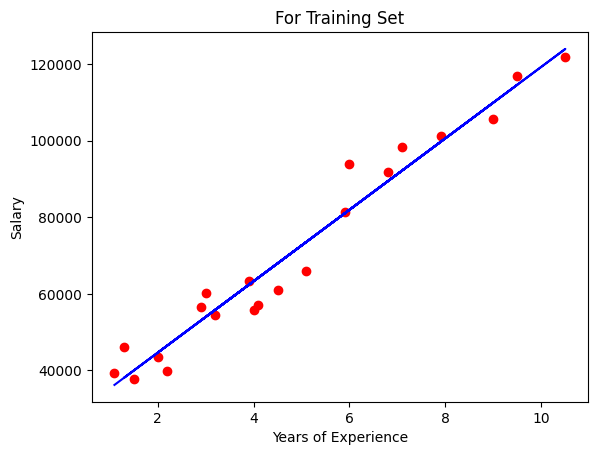

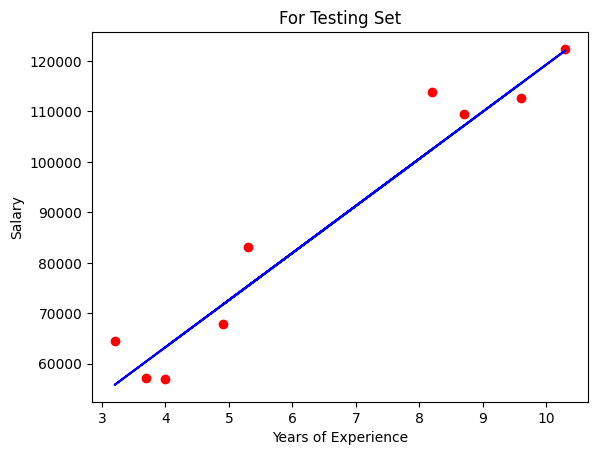

In [18]:
# Visualising the Train set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, linear.predict(X_train), color = 'blue')
plt.title('For Training Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, linear.predict(X_test), color = 'blue')
plt.title('For Testing Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

###**Calculate Error**

In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 37784662.46621314


In [20]:
#CALULATION OF ERROR FOR THE PURPOSE OF UNDERSTANDING
results['Difference'] = results['Actual_Salary'] - results['Predicted_Salary']
results['Squared_Difference'] = results['Difference'] ** 2
mse = results['Squared_Difference'].mean()
print(f'Mean Squared Error (manual calculation): {mse}\n')
results

Mean Squared Error (manual calculation): 37784662.46621314



,Year_experience,Actual_Salary,Predicted_Salary,Difference,Squared_Difference
0,9.6,112635.0,115573.622884,-2938.622884,8.635504e+06
1,4.9,67938.0,71679.938782,-3741.938782,1.400211e+07
2,8.2,113812.0,102498.908470,11313.091530,1.279860e+08
3,5.3,83088.0,75415.571471,7672.428529,5.886616e+07
4,3.2,64445.0,55803.499851,8641.500149,7.467552e+07
5,3.7,57189.0,60473.040713,-3284.040713,1.078492e+07
6,10.3,122391.0,122110.980090,280.019910,7.841115e+04
7,8.7,109431.0,107168.449332,2262.550668,5.119136e+06
8,4.0,56957.0,63274.765230,-6317.765230,3.991416e+07


> Here the MSE indicates that, the errors (the differences between actual and predicted values) is quite large. This suggests that this model might be making significant errors in its predictions because the data range are excessively small.



###**DATA PREPROCESSING:**
(Let's try these two methods, even if they don't work, and also analyze the reasons behind their failure.)

Scaling and transformation are both data preprocessing techniques, but they serve different purposes:

**Scaling:**
- Changes the range of the data

**Transformation:**
- Changes the distribution of the data

**Key differences:**
- Scaling affects the data range, while transformation affects the data distribution.
- Scaling is usually reversible, while transformation can be irreversible (e.g., log transformation).

#### **1. Feature Scaling**

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

y_pred_scaled = linear.predict(X_test_scaled)

In [22]:
X_train_scaled

array([[-1.36666691],
       [-0.96398827],
       [ 0.09761906],
       [-0.70773822],
       [-0.26845243],
       [-0.30505958],
       [ 1.12261925],
       [-1.29345261],
       [-1.22023831],
       [ 1.52529789],
       [-1.03720256],
       [ 0.82976205],
       [ 1.70833364],
       [ 0.39047626],
       [ 2.07440513],
       [ 0.7199406 ],
       [-0.59791677],
       [-0.34166673],
       [-0.12202383],
       [ 0.42708341],
       [-0.67113107]])

In [23]:
scaled_results = pd.DataFrame(X_test, columns=['Year_experience'])
scaled_results['Actual_Salary'] = y_test
scaled_results['Predicted_Salary'] = y_pred_scaled
scaled_results

,Year_experience,Actual_Salary,Predicted_Salary
0,9.6,112635.0,115573.622884
1,4.9,67938.0,71679.938782
2,8.2,113812.0,102498.908470
3,5.3,83088.0,75415.571471
4,3.2,64445.0,55803.499851
5,3.7,57189.0,60473.040713
6,10.3,122391.0,122110.980090
7,8.7,109431.0,107168.449332
8,4.0,56957.0,63274.765230


In [24]:
mse = mean_squared_error(y_test, y_pred_scaled)
print(f'Mean Squared Error after scaling: {mse}')


Mean Squared Error after scaling: 37784662.46621313


- There is no change in error. Since the model only has one feature, scaling doesn’t play a major role in influencing the MSE. linear models are robust to feature scaling in cases the data has single feature. This is why for a univariate linear model scaling is not crucial step.

#### **2. Transformation**

In [25]:
y_train_transformed = np.log(y_train)
y_test_transformed = np.log(y_test)

linear_transformed = LinearRegression()
linear_transformed.fit(X_train_scaled, y_train_transformed)

y_pred_transformed = linear_transformed.predict(X_test_scaled)
y_pred_original = np.exp(y_pred_transformed)


In [26]:
mse_trans = mean_squared_error(y_test, y_pred_original)
print(f'Mean Squared Error: {mse_trans}')

Mean Squared Error: 73568975.13648798


- For the purpose of understanding Transformation is figured here. Here both variables have low skewness values, this indicates that this data is fairly symmetric. This means that transformations (like log transformation or other methods for handling skewness) might not be necessary in this case.